In [1]:
# Libs Necessárias

# Libs para Modelagem e Matrizez
import numpy as np
import pandas as pd

# Libs para anaálises gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Lib para ignorar avisos
import warnings

# Desabilitando avisos
warnings.filterwarnings('ignore')

In [6]:
base_dados = pd.read_excel(r"C:\Users\Joao Paulo\OneDrive\Documents\Python_para_Analise_de_Dados_Data_Viking\Vase_004 - Magalu - Sem Resolução.xlsx", engine="openpyxl")
base_dados.head()

,Data,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
0,2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740
1,2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058
2,2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999
3,2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217
4,2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723


In [7]:
base_dados.shape

(247, 7)

In [8]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        247 non-null    datetime64[ns]
 1   Maior       247 non-null    float64       
 2   Menor       247 non-null    float64       
 3   Abertura    247 non-null    float64       
 4   Fechamento  247 non-null    float64       
 5   Volume      247 non-null    int64         
 6   Adj Close   247 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.6 KB


In [9]:
base_dados.describe()

,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
count,247.000000,247.000000,247.000000,247.000000,2.470000e+02,247.000000
mean,18.977530,18.205668,18.629717,18.549555,4.536056e+07,18.541389
std,5.632712,5.567061,5.602659,5.637050,4.082594e+07,5.631316
min,6.200000,5.620000,5.710000,5.740000,8.716100e+06,5.740000
25%,15.010000,14.275000,14.705000,14.555000,2.285200e+07,14.555000
50%,20.650000,19.930000,20.280001,20.270000,3.130900e+07,20.255312
75%,22.595000,21.985001,22.375000,22.200001,4.742785e+07,22.183912
max,27.070000,25.900000,26.250000,26.240000,2.578313e+08,26.220984


# Séries temporais

### Para se trabalhar com séries temporais nesse caso, precisamos fazer com que a coluna de data se torne o index do dataframe.

In [11]:
dados = base_dados.set_index('Data')

dados.head()

,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
Data,,,,,,
2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740
2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058
2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999
2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217
2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723


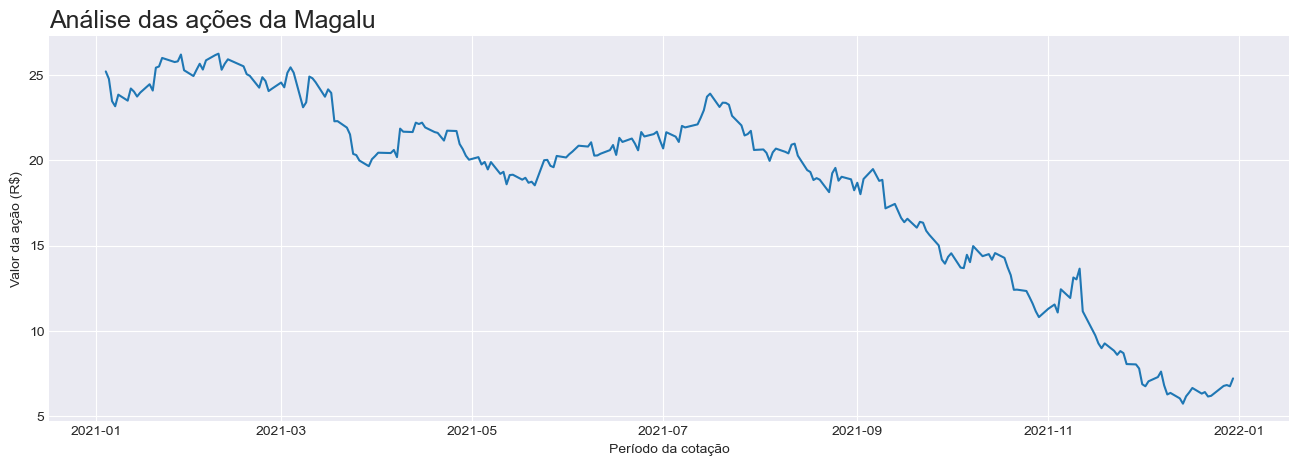

In [19]:
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(16,5))
plt.title('Análise das ações da Magalu', fontsize=18, loc='left')
plt.plot(dados.index, dados["Fechamento"])
plt.xlabel('Período da cotação')
plt.ylabel('Valor da ação (R$)');

In [20]:
dados.tail()

,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
Data,,,,,,
2021-12-23,6.34,5.99,6.22,6.20,97106100,6.20
2021-12-27,6.78,6.23,6.23,6.78,124279800,6.78
2021-12-28,6.96,6.64,6.79,6.83,165573900,6.83
2021-12-29,6.90,6.70,6.84,6.76,79247400,6.76
2021-12-30,7.41,6.77,6.80,7.22,180329400,7.22


## Média móvel

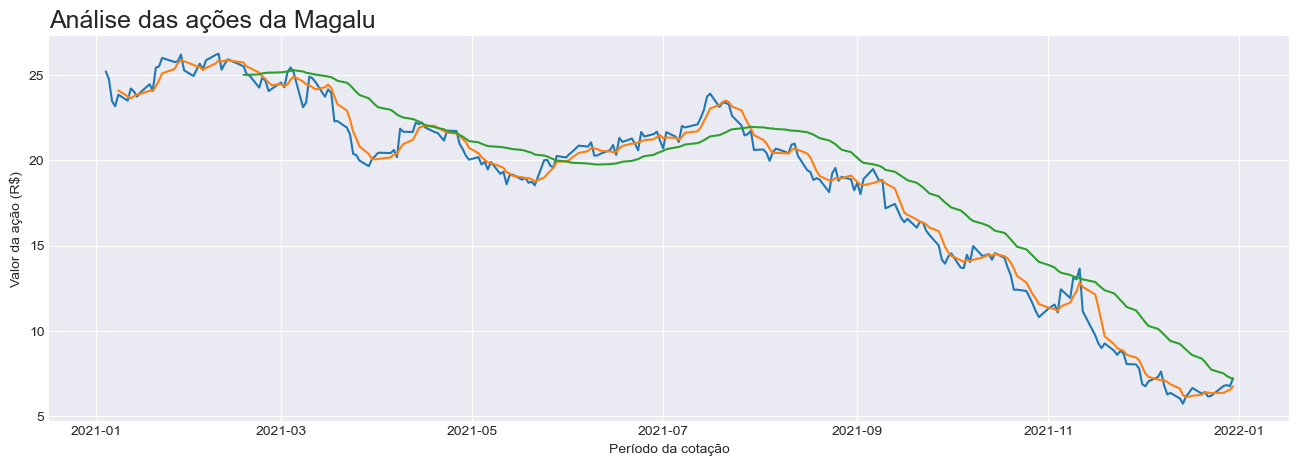

In [24]:
media_movel = dados['Fechamento'].rolling(5).mean()
media_tendencia = dados['Fechamento'].rolling(30).mean()

plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(16,5))
plt.title('Análise das ações da Magalu', fontsize=18, loc='left')

plt.plot(dados.index, dados["Fechamento"])
plt.plot(media_movel.index, media_movel)
plt.plot(media_tendencia.index, media_tendencia)

plt.xlabel('Período da cotação')
plt.ylabel('Valor da ação (R$)');


<Axes: xlabel='Fechamento'>

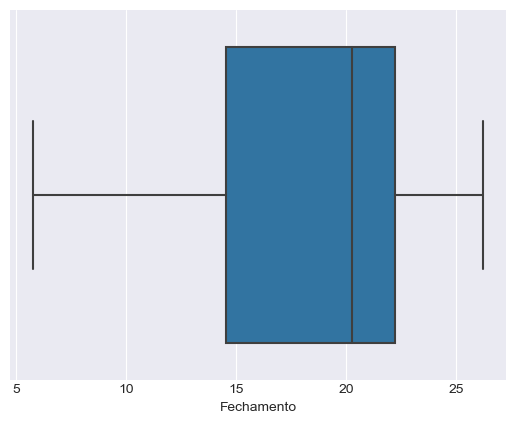

In [26]:
sns.boxplot(data=dados, x='Fechamento')

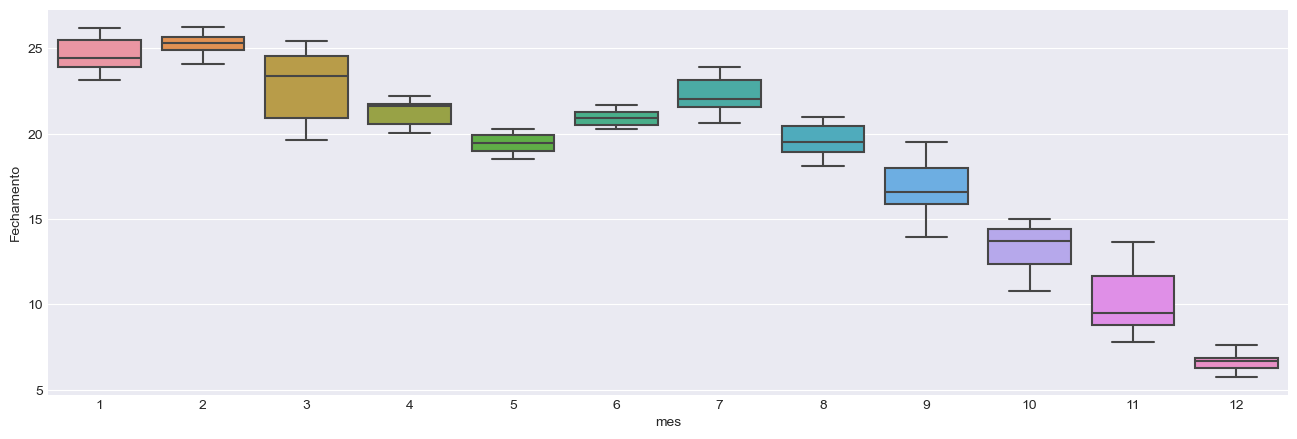

In [28]:
# Boxplot mensal
base_dados['mes'] = base_dados['Data'].dt.month

plt.figure(figsize=(16,5))
sns.boxplot(data=base_dados,x='mes', y='Fechamento');

In [30]:
base_dados.groupby(by='mes').describe()['Fechamento'].reset_index()

,mes,count,mean,std,min,25%,50%,75%,max
0,1,19.0,24.644737,0.960280,23.160000,23.900000,24.450001,25.455000,26.190001
1,2,18.0,25.208889,0.656021,24.049999,24.877501,25.299999,25.650000,26.240000
2,3,23.0,22.855217,1.976698,19.650000,20.940001,23.389999,24.559999,25.440001
3,4,20.0,21.249000,0.735297,20.030001,20.560000,21.625000,21.760000,22.200001
4,5,21.0,19.430476,0.564973,18.530001,18.969999,19.459999,19.900000,20.250000
5,6,21.0,20.898095,0.463116,20.270000,20.500000,20.889999,21.270000,21.670000
6,7,21.0,22.232857,0.977574,20.600000,21.530001,22.040001,23.120001,23.900000
7,8,22.0,19.656818,0.885827,18.129999,18.897500,19.485000,20.452499,20.969999
8,9,21.0,16.746191,1.628581,13.940000,15.870000,16.570000,18.010000,19.480000
9,10,20.0,13.350000,1.267667,10.810000,12.392500,13.720000,14.400000,14.970000


# Gráfico candlestick

## O vermelho significa que a ação fechou em queda. O verde significa que a ação fechou em alta.

In [33]:
# Gráfico candlestick

grafico = go.Figure(
    data=[
        go.Candlestick(
            x = dados.index,
            open = dados['Abertura'],
            high = dados['Maior'],
            low = dados['Menor'],
            close = dados['Fechamento']
        )
        
    ]
)

grafico.show()